# Felipe Castillo
# Mushroom Classification
# Data Mining
# 04/30/2022

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week7\Mushroom')


In [128]:
#!{sys.executable} -m pip install graphviz

# 1. Import the data as a data frame and ensure it is loaded correctly.

In [3]:
#Loading Data
mushroom_df = pd.read_csv("mushrooms.csv")

In [4]:
#Loading data
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#Making sure there are no null values.
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 2.Convert the categorical features (all of them) to dummy variables.

In [6]:
#Divide class and define it as target
mushroom_target_df = pd.get_dummies(mushroom_df['class'])

#Droping class and setting the rest as features
mushroom_features_df = pd.get_dummies(mushroom_df.drop(["class"],axis=1))

# 3.Split the data into a training and test set.

In [7]:
#Splitting data 80 / 20 
features_test , features_train, target_test, target_train = train_test_split(mushroom_features_df,mushroom_target_df,test_size = 0.20)

# 4.Fit a decision tree classifier on the training set.

In [8]:
#Instantiating DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)

In [9]:
#Fitting model with trainning set
model = decisiontree.fit(features_train,target_train)

In [10]:
#Predicting model with features test set
target_predicted = model.predict(features_test)

# 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [11]:
#Finding Accuracy score
accuracy_score(target_test,target_predicted)

0.9995383905216187

In [12]:
#Making a confusion matrix
#Reformatting data set with numpy
results = confusion_matrix(np.asarray(target_test).argmax(axis=1), np.asarray(target_predicted).argmax(axis=1))
print(results)

[[3380    0]
 [   3 3116]]


<AxesSubplot:>

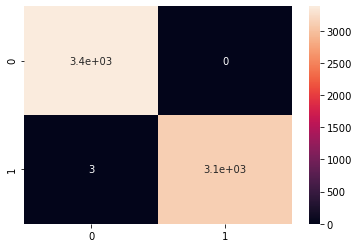

In [13]:
#Outputting confusion matrix heatmap 
sns.heatmap(results, annot=True)

# 6. Create a visualization of the decision tree.

In [14]:
#Setting dot data
dot_data = tree.export_graphviz(decisiontree,
                               out_file=None,
                               feature_names=mushroom_features_df.columns)

In [15]:
#Setting pydotplus graph from with dot data
graph = pydotplus.graph_from_dot_data(dot_data)

In [26]:
#---------Warning this part of the code should not be run if computer is able to find Graphviz/bin------
#---------Do not run if envorinment varaibles with Graphviz are working correctly-----------------

#If the computer is unable to run, steps need to be take to insure this runs correctly
#1. Make sure Graphviz is download https://graphviz.org/download/
#2. Include in envorinment varaibles, which should land in Program Files (x86) directory 
#3. Download graphviz "!{sys.executable} -m pip install graphviz",import sys to run
#4 If still unable to locate directory, set path to graphviz location.


#C:\Program Files (x86)\Graphviz\bin
#Had a hard time finding path of installed graphviz after envorinment varaibles set, force find path.
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

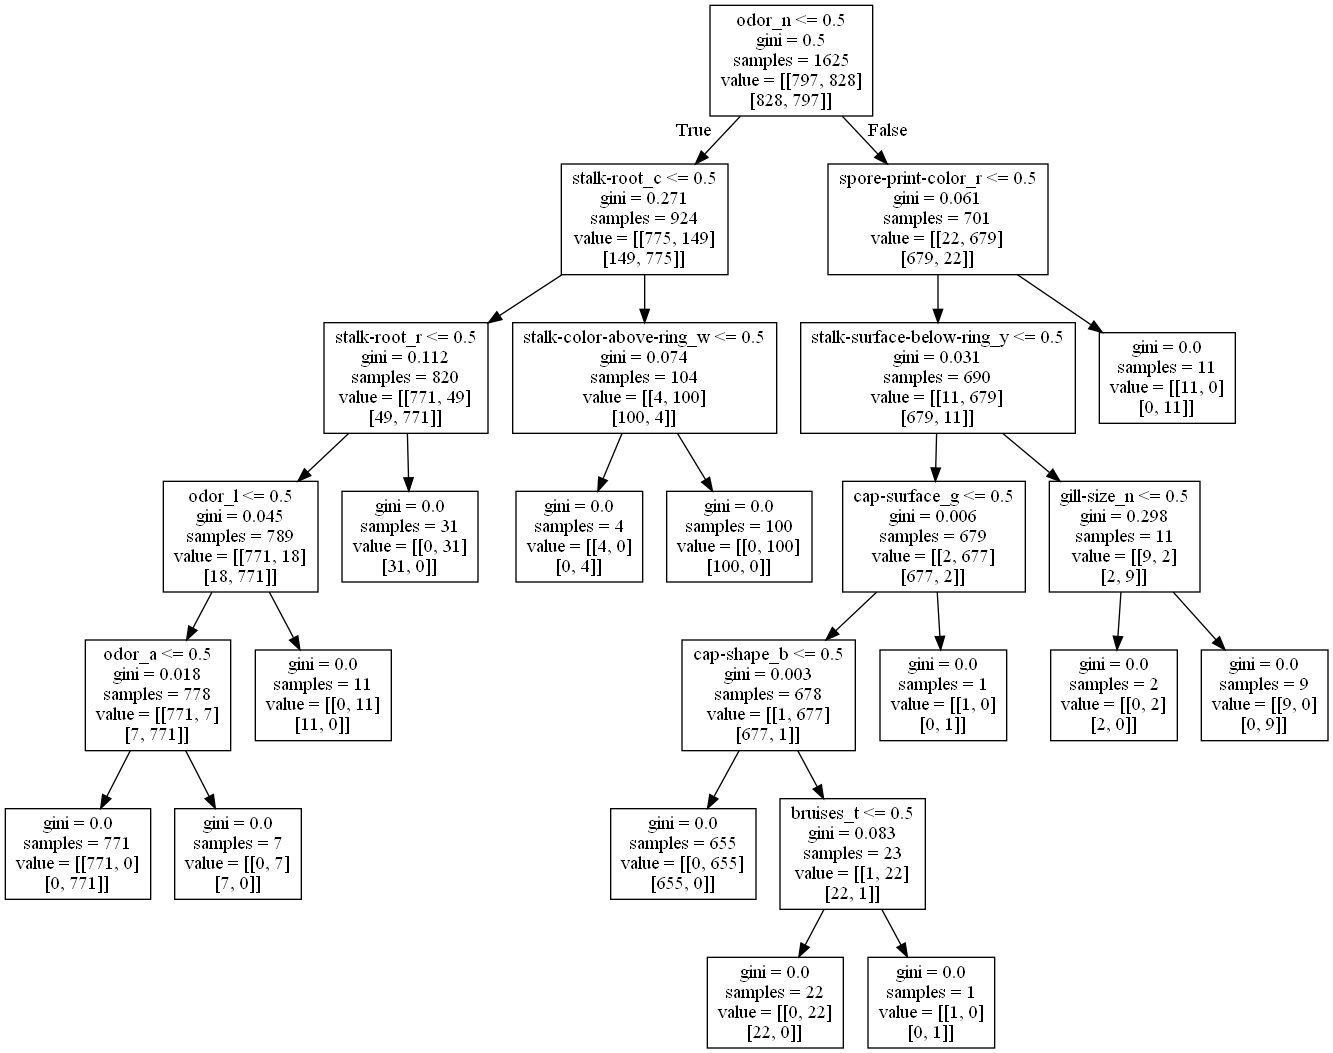

In [27]:
#Invokeing Image Function with graph png
Image(graph.create_png())

# 7.Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [28]:
#Setting chi2 selector to chi2 best of 5
chi2_selector = SelectKBest(chi2, k=5)

#Fit transform on chi2 selector
features_best = chi2_selector.fit_transform(mushroom_features_df, mushroom_target_df)

# 8.Which five features were selected in step 7? Hint: Use the get_support function.

In [19]:
#Original features 117
print("Original", mushroom_features_df.shape[1])

#Best Features 5
print("Features best:" , features_best.shape[1])

Original 117
Features best: 5


In [20]:
print(chi2_selector.get_support(indices=True))

[24 27 37 57 61]


In [21]:
#Getting actaul column names of best five
mushroom_features_df.columns[chi2_selector.get_support(indices= True)].tolist()

['odor_f',
 'odor_n',
 'gill-color_b',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k']

# 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [22]:
#Retrain with best 5 features setting 80/20 
features_test , features_train, target_test, target_train = train_test_split(features_best,mushroom_target_df,test_size = 0.20)

In [23]:
#Instantiating DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)

#Setting model to best five features
model = decisiontree.fit(features_train,target_train)

In [24]:
#Getting predictive model
target_predicted = model.predict(features_test)

In [25]:
#Getting accuracy
accuracy_score(target_test,target_predicted)

0.929835359286044

# 10. Summarize your findings.

Overall, the accuracy score went down. This can be due to less features that available. However even though the accuracy is lower, it might be possible to trust this model more than the last one. According to the chi2 feature, it takes the best of 5. What’s interesting is before any changes the model had a score of 99 percent now it has a score of 92 percent. Either way the accuracy is still pretty high.The decision graph used the odor_n as its first node. From there the first decision can go to ways true or false. The chi2 returned the 5 highest variances which were 'odor_f','odor_n','gill-color_b','stalk-surface-above-ring_k','stalk-surface-below-ring_k'.